### Data Dictionary

grade: The grade in school of the student (most 15-year-olds in America are in 10th grade)

male: Whether the student is male (1/0)

raceeth: The race/ethnicity composite of the student

preschool: Whether the student attended preschool (1/0)

expectBachelors: Whether the student expects to obtain a bachelor's degree (1/0)

motherHS: Whether the student's mother completed high school (1/0)

motherBachelors: Whether the student's mother obtained a bachelor's degree (1/0)

motherWork: Whether the student's mother has part-time or full-time work (1/0)

fatherHS: Whether the student's father completed high school (1/0)

fatherBachelors: Whether the student's father obtained a bachelor's degree (1/0)

fatherWork: Whether the student's father has part-time or full-time work (1/0)

selfBornUS: Whether the student was born in the United States of America (1/0)

motherBornUS: Whether the student's mother was born in the United States of America (1/0)

fatherBornUS: Whether the student's father was born in the United States of America (1/0)

englishAtHome: Whether the student speaks English at home (1/0)

computerForSchoolwork: Whether the student has access to a computer for schoolwork (1/0)

read30MinsADay: Whether the student reads for pleasure for 30 minutes/day (1/0)

minutesPerWeekEnglish: The number of minutes per week the student spend in English class

studentsInEnglish: The number of students in this student's English class at school

schoolHasLibrary: Whether this student's school has a library (1/0)

publicSchool: Whether this student attends a public school (1/0)

urban: Whether this student's school is in an urban area (1/0)

schoolSize: The number of students in this student's school

readingScore: The student's reading score, on a 1000-point scale

In this homework assignment, 
we will predict the reading scores of students from the United States of America on the 2009 PISA exam.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("pisa2009train.csv",low_memory=False)

In [3]:
df

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,54.0,36.0,1.0,1,1,NaN,363.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [5]:
df.describe(include='all')

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3628,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,3594.000000,3592.000000,3550.000000,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
unique,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.089817,0.511057,NaN,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,0.931274,0.772550,0.766761,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,NaN,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,0.253022,0.419244,0.422953,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000


In [6]:
df.shape

(3663, 24)

In [7]:
df.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

### Data Visualization

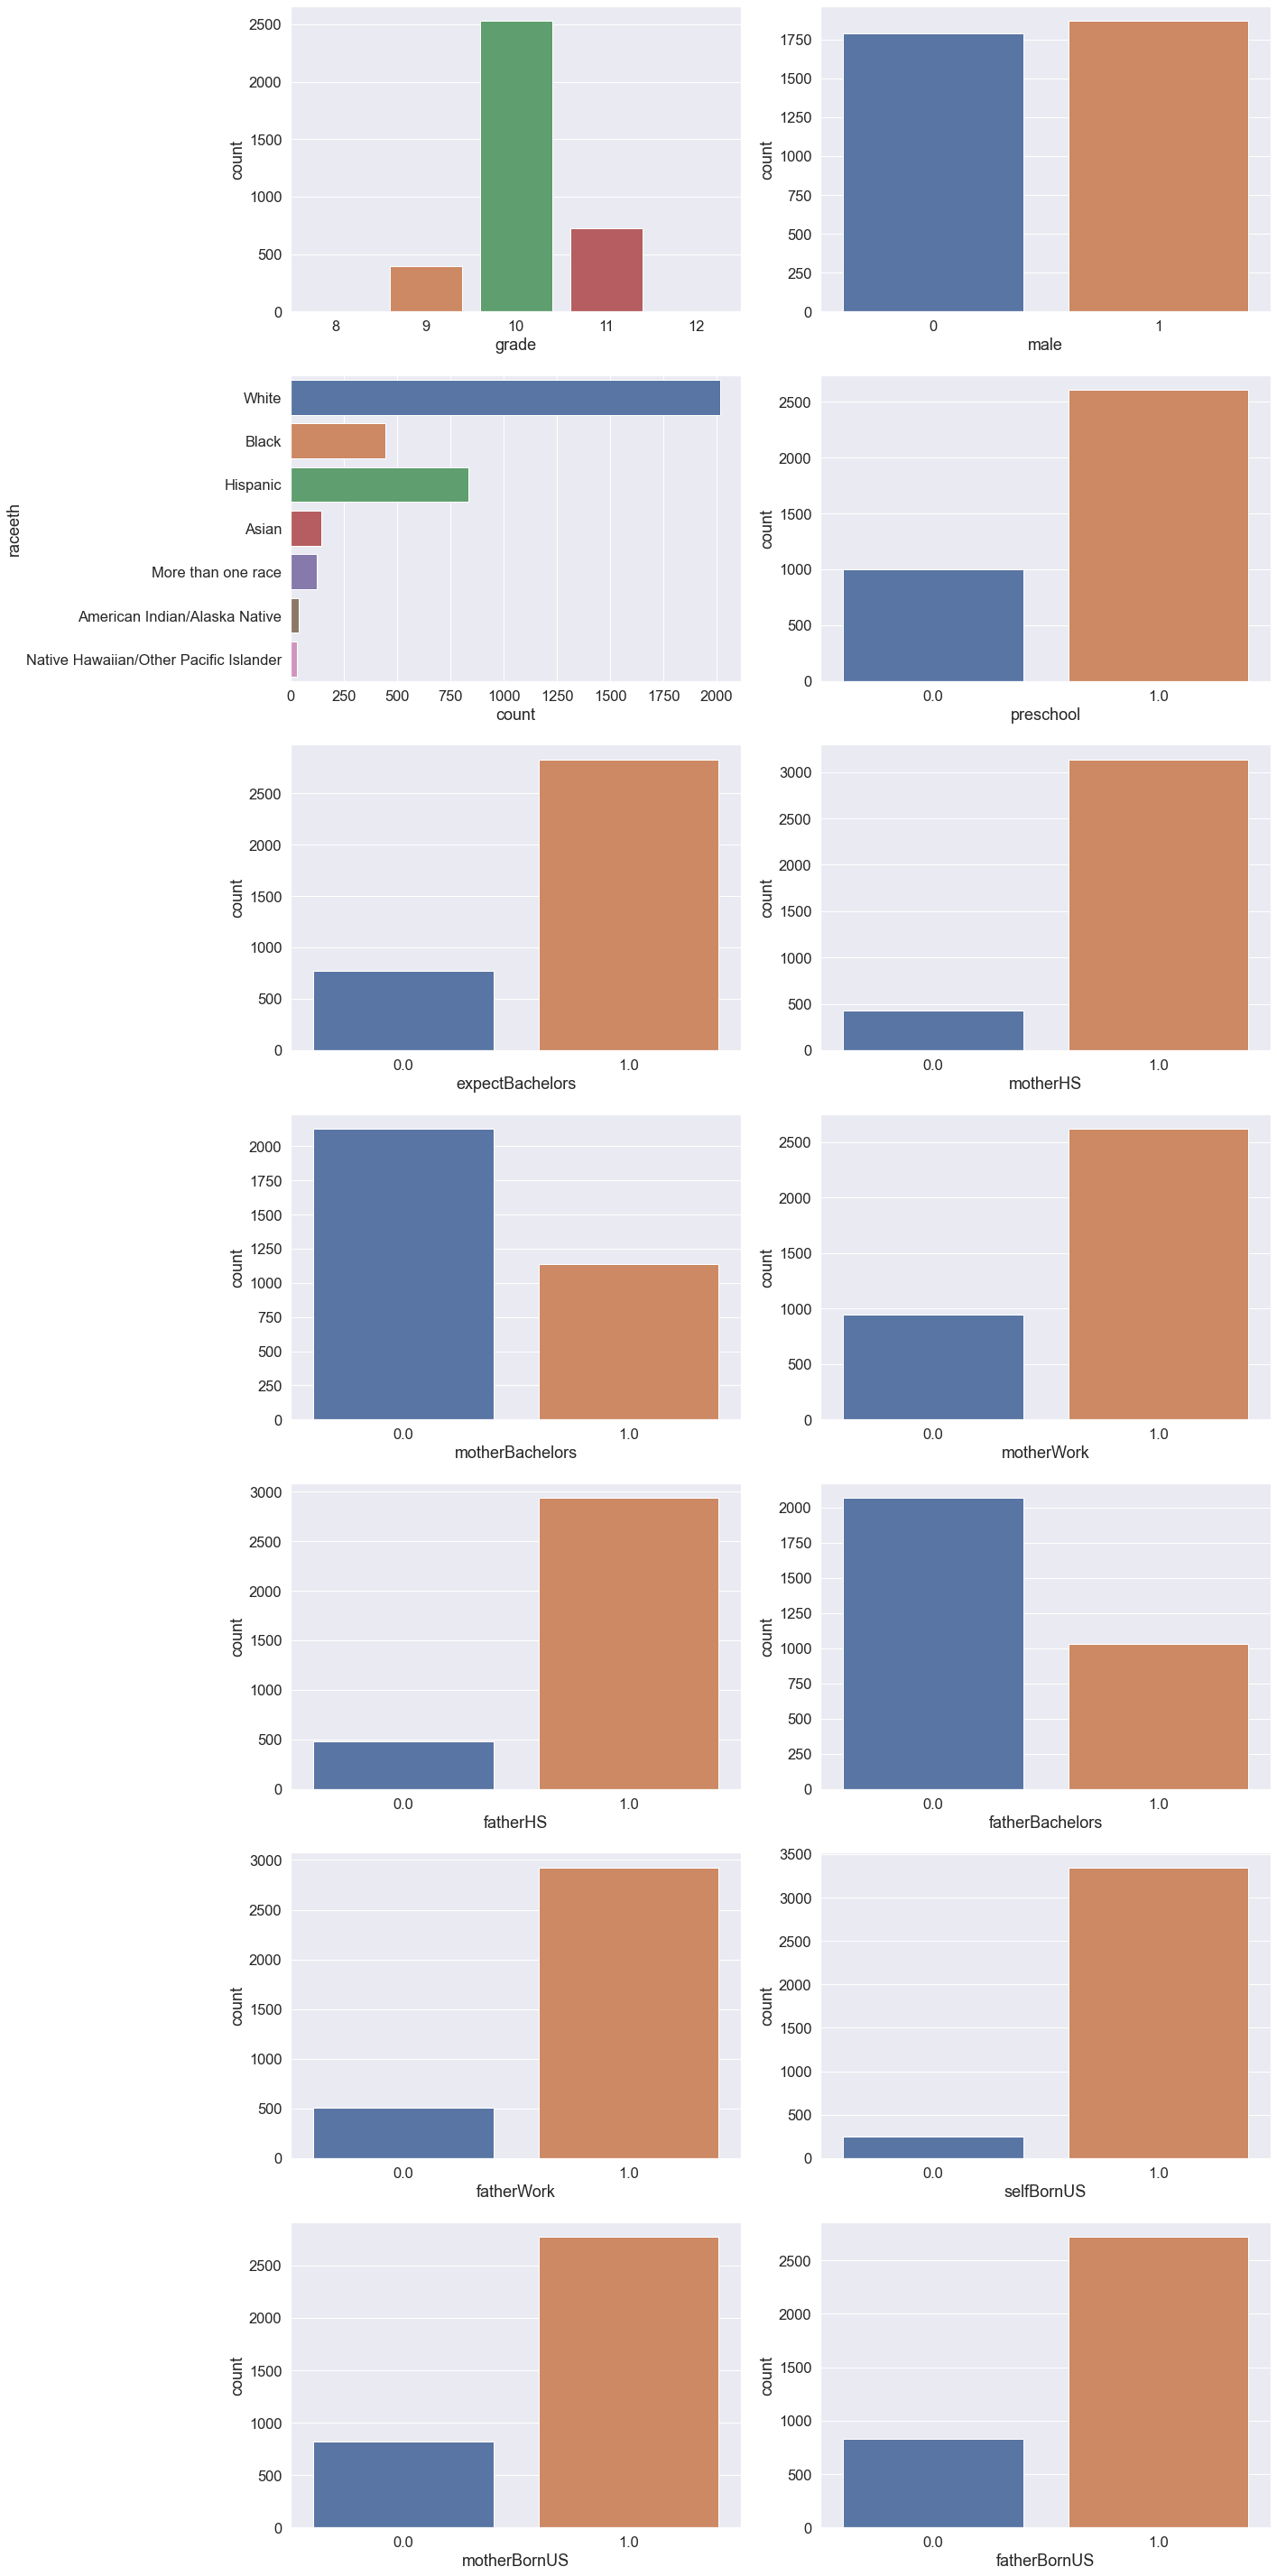

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.grade)
plt.subplot(7,2,2)
sns.countplot(df.male)
plt.subplot(7,2,3)
sns.countplot(y=df.raceeth)
plt.subplot(7,2,4)
sns.countplot(df.preschool)
plt.subplot(7,2,5)
sns.countplot(df.expectBachelors)
plt.subplot(7,2,6)
sns.countplot(df.motherHS)
plt.subplot(7,2,7)
sns.countplot(df.motherBachelors)
plt.subplot(7,2,8)
sns.countplot(df.motherWork)
plt.subplot(7,2,9)
sns.countplot(df.fatherHS)
plt.subplot(7,2,10)
sns.countplot(df.fatherBachelors)
plt.subplot(7,2,11)
sns.countplot(df.fatherWork)
plt.subplot(7,2,12)
sns.countplot(df.selfBornUS)
plt.subplot(7,2,13)
sns.countplot(df.motherBornUS)
plt.subplot(7,2,14)
sns.countplot(df.fatherBornUS)

plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

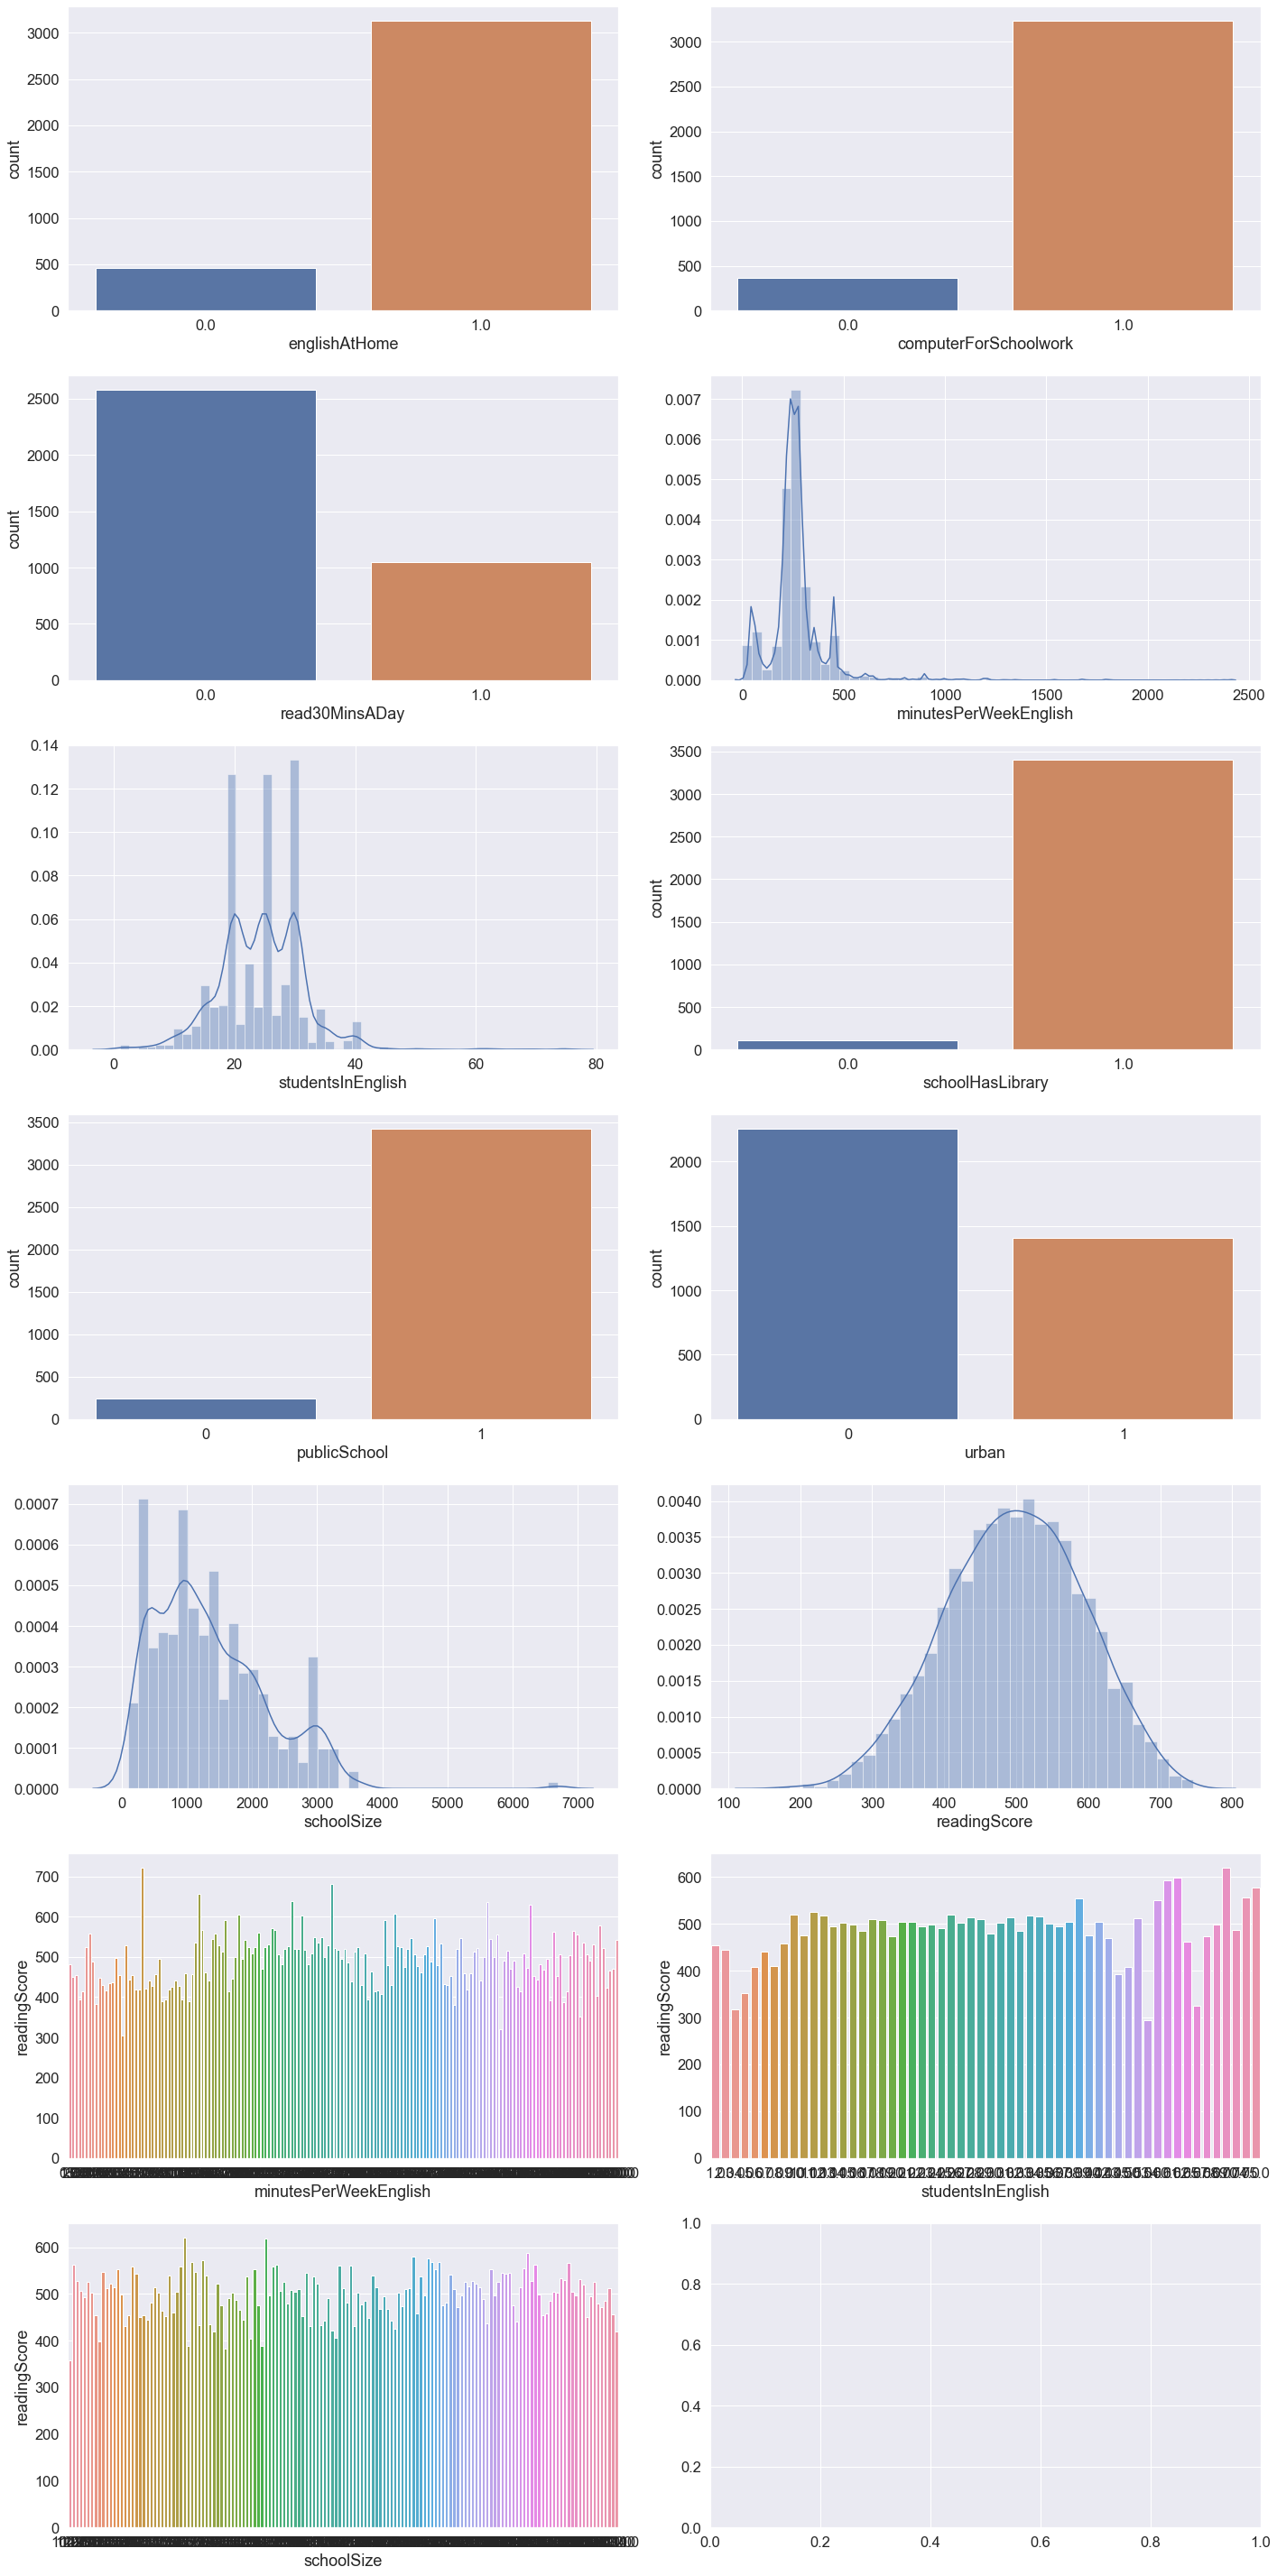

In [10]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.englishAtHome)
plt.subplot(7,2,2)
sns.countplot(df.computerForSchoolwork)
plt.subplot(7,2,3)
sns.countplot(df.read30MinsADay)
plt.subplot(7,2,4)
sns.distplot(df.minutesPerWeekEnglish)
plt.subplot(7,2,5)
sns.distplot(df.studentsInEnglish)
plt.subplot(7,2,6)
sns.countplot(df.schoolHasLibrary)
plt.subplot(7,2,7)
sns.countplot(df.publicSchool)
plt.subplot(7,2,8)
sns.countplot(df.urban)
plt.subplot(7,2,9)
sns.distplot(df.schoolSize)
plt.subplot(7,2,10)
sns.distplot(df.readingScore)
plt.subplot(7,2,11)
sns.barplot(x=df.minutesPerWeekEnglish,y=df.readingScore,ci=None)
plt.subplot(7,2,12)
sns.barplot(x=df.studentsInEnglish,y=df.readingScore,ci=None)
plt.subplot(7,2,13)
sns.barplot(x=df.schoolSize,y=df.readingScore,ci=None)
plt.subplot(7,2,14)
#sns.barplot(x=df.minutesPerWeekEnglish,y=df.readingScore)

plt.tight_layout()
plt.show()

In [11]:
df.corr()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.097677,-0.023262,0.140200,0.005461,0.043171,0.019385,0.046210,0.061713,0.012731,-0.022154,-0.072814,-0.063530,-0.025675,0.112157,0.065008,0.028157,0.085289,-0.026542,-0.063972,0.076277,0.067454,0.286752
male,-0.097677,1.000000,0.014807,-0.078029,0.030586,0.074250,-0.011641,0.017784,0.076257,0.030614,0.022550,0.015107,0.008212,-0.009790,-0.015485,-0.220103,0.010700,-0.025404,0.032114,-0.075466,0.036377,0.012921,-0.153928
preschool,-0.023262,0.014807,1.000000,0.076046,0.141552,0.151832,0.069249,0.117443,0.141418,0.065079,0.092893,0.111684,0.112208,0.120480,0.076612,-0.008649,-0.015110,-0.027114,0.036506,-0.070919,-0.053684,-0.032582,0.040537
expectBachelors,0.140200,-0.078029,0.076046,1.000000,0.104886,0.168330,0.069366,0.156028,0.199217,0.003122,-0.010330,0.012359,0.015281,0.044169,0.130413,0.135002,0.018364,0.050988,0.072164,-0.112698,-0.004022,0.016164,0.360144
motherHS,0.005461,0.030586,0.141552,0.104886,1.000000,0.252322,0.176354,0.500723,0.227148,0.038105,0.179856,0.343146,0.336373,0.374486,0.187951,0.011641,0.019021,-0.036948,0.012129,-0.067646,-0.117988,-0.084460,0.156488
motherBachelors,0.043171,0.074250,0.151832,0.168330,0.252322,1.000000,0.142306,0.197929,0.543581,0.071973,0.044804,0.146741,0.125661,0.169733,0.146681,0.021138,0.023004,-0.041765,0.022990,-0.161796,-0.048131,-0.011638,0.214240
motherWork,0.019385,-0.011641,0.069249,0.069366,0.176354,0.142306,1.000000,0.102632,0.057245,0.039578,0.065549,0.096057,0.096592,0.128595,0.083805,-0.049956,0.009103,-0.032115,-0.011439,-0.036711,-0.012350,-0.039499,0.043401
fatherHS,0.046210,0.017784,0.117443,0.156028,0.500723,0.197929,0.102632,1.000000,0.280287,0.100620,0.139385,0.279932,0.308128,0.324131,0.173284,0.032457,0.041421,-0.007217,0.030027,-0.080654,-0.098083,-0.080115,0.175464
fatherBachelors,0.061713,0.076257,0.141418,0.199217,0.227148,0.543581,0.057245,0.280287,1.000000,0.106328,0.011592,0.081497,0.091718,0.138824,0.174256,0.047728,0.007736,-0.019529,0.017605,-0.176680,-0.018506,0.019602,0.266236
fatherWork,0.012731,0.030614,0.065079,0.003122,0.038105,0.071973,0.039578,0.100620,0.106328,1.000000,-0.028350,-0.008205,-0.004942,0.022521,0.078806,-0.012103,0.030462,-0.000204,-0.012325,-0.023248,-0.039698,-0.023414,0.070423


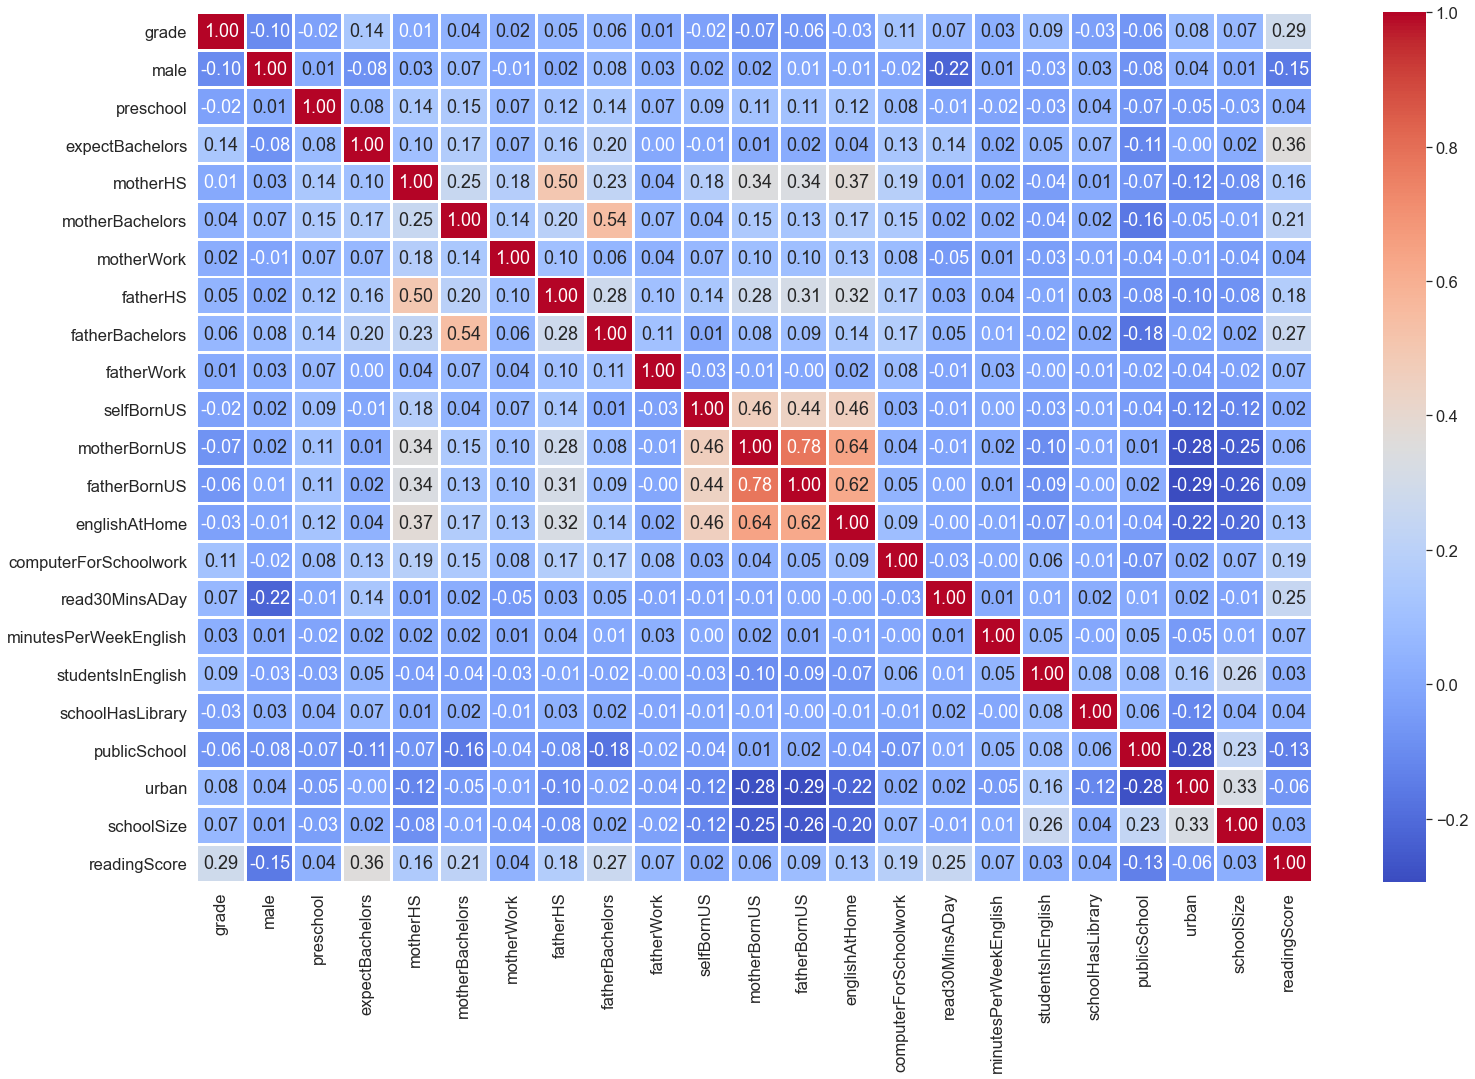

In [12]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [13]:
# sns.pairplot(df.sample(100))
# plt.show()

### Data Preprocessing

### Treat Missing Values

In [14]:
df.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [15]:
imputer1 = mdi.FrequentCategoryImputer(variables=['raceeth'])

In [16]:
imputer1.fit(df)

FrequentCategoryImputer(variables=['raceeth'])

In [17]:
imputer1.variables

['raceeth']

In [18]:
df = imputer1.transform(df)

In [19]:
df['raceeth'].value_counts()

White                                     2050
Hispanic                                   834
Black                                      444
Asian                                      143
More than one race                         124
American Indian/Alaska Native               37
Native Hawaiian/Other Pacific Islander      31
Name: raceeth, dtype: int64

In [20]:
df.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [21]:
imputer2 = mdi.ArbitraryNumberImputer(arbitrary_number=0.0,variables=['preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors','fatherWork', 'selfBornUS', 'motherBornUS', 
       'fatherBornUS','englishAtHome', 'computerForSchoolwork', 'read30MinsADay','schoolHasLibrary',
       'publicSchool', 'urban'])

In [22]:
imputer2.fit(df)

ArbitraryNumberImputer(arbitrary_number=0.0,
                       variables=['preschool', 'expectBachelors', 'motherHS',
                                  'motherBachelors', 'motherWork', 'fatherHS',
                                  'fatherBachelors', 'fatherWork', 'selfBornUS',
                                  'motherBornUS', 'fatherBornUS',
                                  'englishAtHome', 'computerForSchoolwork',
                                  'read30MinsADay', 'schoolHasLibrary',
                                  'publicSchool', 'urban'])

In [23]:
df = imputer2.transform(df)

In [24]:
df

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,White,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,54.0,36.0,1.0,1,1,NaN,363.61


In [25]:
df.isnull().sum()

grade                      0
male                       0
raceeth                    0
preschool                  0
expectBachelors            0
motherHS                   0
motherBachelors            0
motherWork                 0
fatherHS                   0
fatherBachelors            0
fatherWork                 0
selfBornUS                 0
motherBornUS               0
fatherBornUS               0
englishAtHome              0
computerForSchoolwork      0
read30MinsADay             0
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary           0
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [26]:
imputer3 = mdi.MeanMedianImputer(imputation_method='median',variables=['minutesPerWeekEnglish', 'studentsInEnglish',
                                                                      'schoolSize'])

In [27]:
imputer3.fit(df)

MeanMedianImputer(imputation_method='median',
                  variables=['minutesPerWeekEnglish', 'studentsInEnglish',
                             'schoolSize'])

In [28]:
df = imputer3.transform(df)

In [29]:
df.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [30]:
df

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,White,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,25.0,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,54.0,36.0,1.0,1,1,1212.0,363.61


### Treat Duplicate Values

In [31]:
df.duplicated(keep='first').sum()

0

In [32]:
# df[df.duplicated(keep=False)]

In [33]:
# df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [34]:
df.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,10.089817,0.511057,0.711712,0.772591,0.856675,0.310401,0.715807,0.801802,0.280371,0.798799,0.913732,0.757576,0.743107,0.854764,0.883429,0.287196,265.385203,24.533443,0.929839,0.933934,0.384930,1362.359268,497.911403
std,0.554375,0.499946,0.453028,0.419216,0.350452,0.462721,0.451091,0.398697,0.449242,0.400953,0.280798,0.428608,0.436980,0.352387,0.320952,0.452516,144.629357,6.936941,0.255453,0.248431,0.486645,851.137669,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,762.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,294.500000,30.000000,1.000000,1.000000,1.000000,1897.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


In [35]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['minutesPerWeekEnglish', 'studentsInEnglish','schoolSize'])

In [36]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['minutesPerWeekEnglish', 'studentsInEnglish',
                      'schoolSize'])

In [37]:
df_t = windsorizer.transform(df)

In [38]:
df_t

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,White,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.00,25.0,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,398.75,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.00,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.00,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.00,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.00,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,398.75,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.00,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,120.75,36.0,1.0,1,1,1212.0,363.61


In [39]:
df_t.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,10.089817,0.511057,0.711712,0.772591,0.856675,0.310401,0.715807,0.801802,0.280371,0.798799,0.913732,0.757576,0.743107,0.854764,0.883429,0.287196,256.225089,24.445536,0.929839,0.933934,0.384930,1354.756074,497.911403
std,0.554375,0.499946,0.453028,0.419216,0.350452,0.462721,0.451091,0.398697,0.449242,0.400953,0.280798,0.428608,0.436980,0.352387,0.320952,0.452516,74.061159,6.427448,0.255453,0.248431,0.486645,816.587337,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.750000,5.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,762.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,294.500000,30.000000,1.000000,1.000000,1.000000,1897.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,398.750000,45.000000,1.000000,1.000000,1.000000,3599.500000,746.000000


In [40]:
windsorizer.left_tail_caps_

{'minutesPerWeekEnglish': 120.75,
 'studentsInEnglish': 5.0,
 'schoolSize': -940.5}

In [41]:
windsorizer.right_tail_caps_

{'minutesPerWeekEnglish': 398.75,
 'studentsInEnglish': 45.0,
 'schoolSize': 3599.5}

### Treat Data Types

In [42]:
df.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

In [43]:
#df.to_csv("pisatrain.csv",index=False)

### Feature Scaling

In [44]:
df

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,White,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,25.0,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,54.0,36.0,1.0,1,1,1212.0,363.61


In [45]:
df.drop(['grade','raceeth'],axis=1,inplace=True)

In [46]:
df

,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,25.0,1.0,1,1,673.0,476.00
1,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,54.0,36.0,1.0,1,1,1212.0,363.61


In [47]:
df_num = df[['minutesPerWeekEnglish','studentsInEnglish','schoolSize']]

In [48]:
df_num

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
0,225.0,25.0,673.0
1,450.0,25.0,1173.0
2,250.0,28.0,1233.0
3,200.0,23.0,2640.0
4,250.0,35.0,1095.0
...,...,...,...
3658,250.0,20.0,421.0
3659,450.0,16.0,1317.0
3660,225.0,16.0,539.0
3661,54.0,36.0,1212.0


In [49]:
minmax = MinMaxScaler()

In [50]:
dfnumscaled = minmax.fit_transform(df_num)

In [51]:
dfnumscaled = pd.DataFrame(dfnumscaled,columns=df_num.columns)

In [52]:
dfnumscaled

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
0,0.093750,0.324324,0.086897
1,0.187500,0.324324,0.162724
2,0.104167,0.364865,0.171823
3,0.083333,0.297297,0.385199
4,0.104167,0.459459,0.150895
...,...,...,...
3658,0.104167,0.256757,0.048681
3659,0.187500,0.202703,0.184562
3660,0.093750,0.202703,0.066576
3661,0.022500,0.472973,0.168638


In [53]:
df.drop(['minutesPerWeekEnglish','studentsInEnglish','schoolSize'],axis=1,inplace=True)

In [54]:
df

,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,schoolHasLibrary,publicSchool,urban,readingScore
0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,476.00
1,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,575.01
2,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,554.81
3,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,458.11
4,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,509.99
3659,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0,444.90
3660,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,476.89
3661,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,363.61


In [55]:
df2 = pd.concat([dfnumscaled,df],axis=1)

In [56]:
df2

,minutesPerWeekEnglish,studentsInEnglish,schoolSize,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,schoolHasLibrary,publicSchool,urban,readingScore
0,0.093750,0.324324,0.086897,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,476.00
1,0.187500,0.324324,0.162724,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,575.01
2,0.104167,0.364865,0.171823,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,554.81
3,0.083333,0.297297,0.385199,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,458.11
4,0.104167,0.459459,0.150895,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,0.104167,0.256757,0.048681,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,509.99
3659,0.187500,0.202703,0.184562,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0,444.90
3660,0.093750,0.202703,0.066576,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,476.89
3661,0.022500,0.472973,0.168638,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,363.61


### Create and save processed dataset

In [57]:
#df2.to_csv("pisatrain.csv",index=False)

### Model Training

In [58]:
#df2 = pd.read_csv("pisatrain.csv")

In [59]:
X = df2.iloc[:,0:21]
y = df2.iloc[:,21]

In [60]:
X.values, y.values

(array([[0.09375   , 0.32432432, 0.08689718, ..., 1.        , 1.        ,
         1.        ],
        [0.1875    , 0.32432432, 0.16272369, ..., 1.        , 1.        ,
         0.        ],
        [0.10416667, 0.36486486, 0.17182287, ..., 1.        , 1.        ,
         0.        ],
        ...,
        [0.09375   , 0.2027027 , 0.06657567, ..., 1.        , 1.        ,
         1.        ],
        [0.0225    , 0.47297297, 0.16863816, ..., 1.        , 1.        ,
         1.        ],
        [0.09791667, 0.32432432, 0.01925993, ..., 1.        , 1.        ,
         0.        ]]),
 array([476.  , 575.01, 554.81, ..., 476.89, 363.61, 551.85]))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2564, 21), (1099, 21), (2564,), (1099,))

In [63]:
xgb = XGBRegressor(random_state=0, n_estimators=200, objective='reg:squarederror')

In [64]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:456.459
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:412.429
[2]	validation_0-rmse:372.976
[3]	validation_0-rmse:337.613
[4]	validation_0-rmse:305.965
[5]	validation_0-rmse:277.746
[6]	validation_0-rmse:252.537
[7]	validation_0-rmse:230.18
[8]	validation_0-rmse:210.162
[9]	validation_0-rmse:192.423
[10]	validation_0-rmse:176.766
[11]	validation_0-rmse:162.928
[12]	validation_0-rmse:150.853
[13]	validation_0-rmse:140.225
[14]	validation_0-rmse:130.969
[15]	validation_0-rmse:123.058
[16]	validation_0-rmse:116.214
[17]	validation_0-rmse:110.361
[18]	validation_0-rmse:105.425
[19]	validation_0-rmse:101.081
[20]	validation_0-rmse:97.4784
[21]	validation_0-rmse:94.5495
[22]	validation_0-rmse:92.0117
[23]	validation_0-rmse:89.9877
[24]	validation_0-rmse:88.2052
[25]	validation_0-rmse:86.7221
[26]	validation_0-rmse:85.4705
[27]	validation_0-rmse:84.431
[28]	validation_0-rmse:83.608
[29]	validation_0-rmse:82.9042
[30]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [65]:
y_pred = xgb.predict(X_test)

In [66]:
y_pred

array([518.3743 , 552.8105 , 480.1238 , ..., 347.44916, 463.16208,
       493.80096], dtype=float32)

### Model Evaluation

In [67]:
mse = mean_squared_error(y_test,y_pred)
mse

6149.812294957717

In [68]:
rmse = np.sqrt(mse)
rmse

78.42073893401998

In [69]:
r2score = r2_score(y_test,y_pred)
r2score

0.31468736696036115

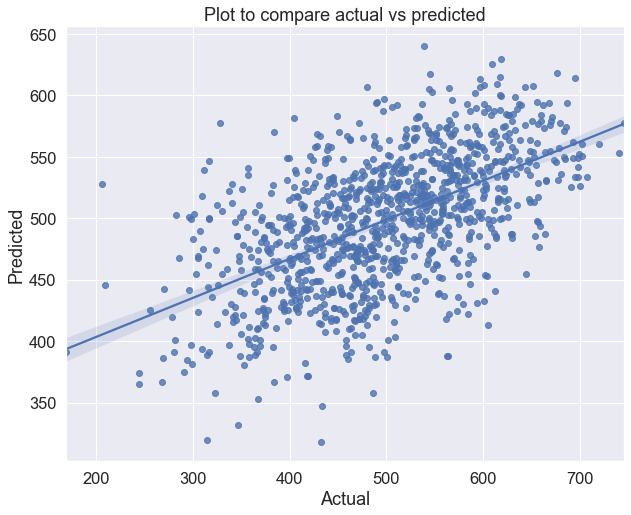

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

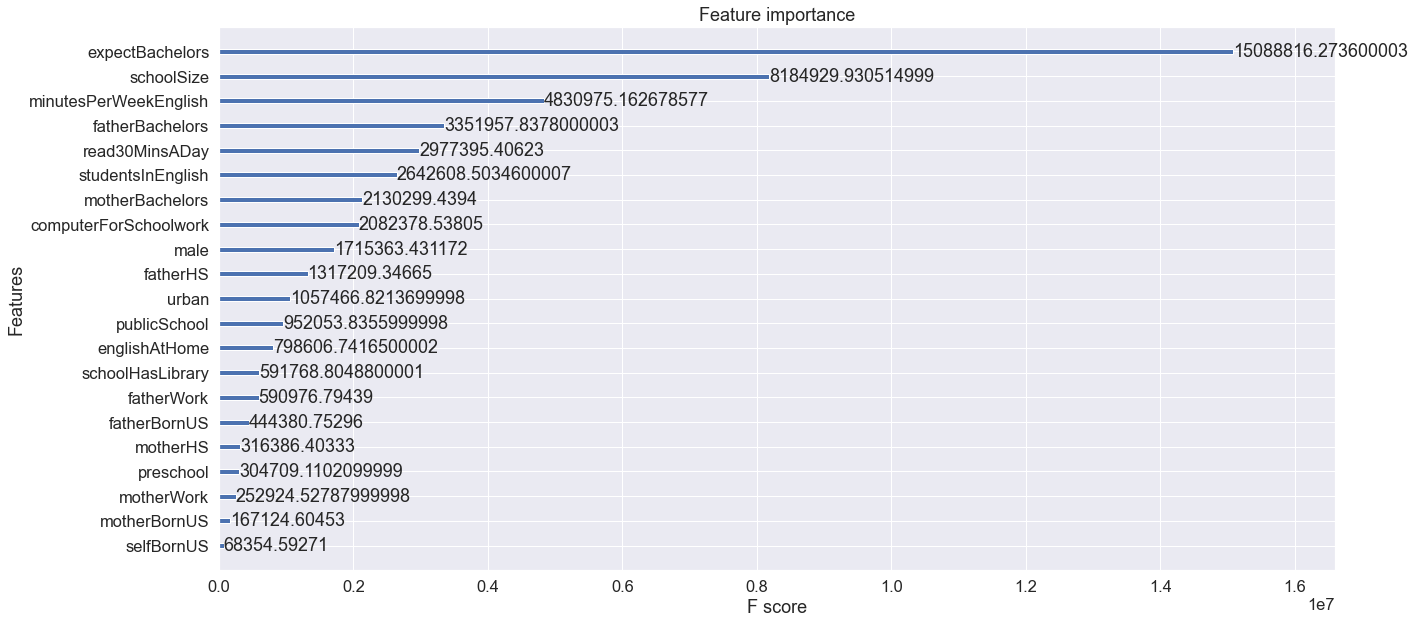

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
plot_importance(xgb,ax=ax,importance_type='total_gain')
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [72]:
# f = 'gain'
# t = 'total_gain'
# xgb.get_booster().get_score(importance_type= t)

### Cross-Validation

In [73]:
cv = cross_val_score(xgb,X,y,cv=5,verbose=2,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [74]:
cv.mean()

0.32291247666086975

### Feature Selection

In [75]:
df2.columns

Index(['minutesPerWeekEnglish', 'studentsInEnglish', 'schoolSize', 'male',
       'preschool', 'expectBachelors', 'motherHS', 'motherBachelors',
       'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS',
       'motherBornUS', 'fatherBornUS', 'englishAtHome',
       'computerForSchoolwork', 'read30MinsADay', 'schoolHasLibrary',
       'publicSchool', 'urban', 'readingScore'],
      dtype='object')

In [76]:
df3 = df2[['expectBachelors','schoolSize','minutesPerWeekEnglish','fatherBachelors','read30MinsADay',
          'studentsInEnglish','motherBachelors','computerForSchoolwork','readingScore']]

In [77]:
df3

,expectBachelors,schoolSize,minutesPerWeekEnglish,fatherBachelors,read30MinsADay,studentsInEnglish,motherBachelors,computerForSchoolwork,readingScore
0,0.0,0.086897,0.093750,0.0,0.0,0.324324,0.0,1.0,476.00
1,0.0,0.162724,0.187500,0.0,1.0,0.324324,1.0,1.0,575.01
2,1.0,0.171823,0.104167,0.0,0.0,0.364865,1.0,1.0,554.81
3,1.0,0.385199,0.083333,0.0,1.0,0.297297,0.0,1.0,458.11
4,0.0,0.150895,0.104167,0.0,1.0,0.459459,0.0,1.0,613.89
...,...,...,...,...,...,...,...,...,...
3658,1.0,0.048681,0.104167,1.0,0.0,0.256757,0.0,1.0,509.99
3659,0.0,0.184562,0.187500,0.0,1.0,0.202703,0.0,0.0,444.90
3660,1.0,0.066576,0.093750,0.0,0.0,0.202703,0.0,1.0,476.89
3661,0.0,0.168638,0.022500,0.0,0.0,0.472973,0.0,1.0,363.61


In [78]:
X = df3.iloc[:,0:8]
y = df3.iloc[:,8]

In [79]:
X.values,y.values

(array([[0.        , 0.08689718, 0.09375   , ..., 0.32432432, 0.        ,
         1.        ],
        [0.        , 0.16272369, 0.1875    , ..., 0.32432432, 1.        ,
         1.        ],
        [1.        , 0.17182287, 0.10416667, ..., 0.36486486, 1.        ,
         1.        ],
        ...,
        [1.        , 0.06657567, 0.09375   , ..., 0.2027027 , 0.        ,
         1.        ],
        [0.        , 0.16863816, 0.0225    , ..., 0.47297297, 0.        ,
         1.        ],
        [1.        , 0.01925993, 0.09791667, ..., 0.32432432, 0.        ,
         1.        ]]),
 array([476.  , 575.01, 554.81, ..., 476.89, 363.61, 551.85]))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
xgb1 = XGBRegressor(random_state=0, n_estimators=200, objective='reg:squarederror')

In [82]:
xgb1.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:454.225
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:410.133
[2]	validation_0-rmse:370.547
[3]	validation_0-rmse:335.224
[4]	validation_0-rmse:303.469
[5]	validation_0-rmse:275.129
[6]	validation_0-rmse:249.964
[7]	validation_0-rmse:227.545
[8]	validation_0-rmse:207.523
[9]	validation_0-rmse:189.917
[10]	validation_0-rmse:174.259
[11]	validation_0-rmse:160.519
[12]	validation_0-rmse:148.589
[13]	validation_0-rmse:138.228
[14]	validation_0-rmse:129.227
[15]	validation_0-rmse:121.437
[16]	validation_0-rmse:114.816
[17]	validation_0-rmse:109.245
[18]	validation_0-rmse:104.473
[19]	validation_0-rmse:100.489
[20]	validation_0-rmse:97.1256
[21]	validation_0-rmse:94.328
[22]	validation_0-rmse:92.0218
[23]	validation_0-rmse:90.1592
[24]	validation_0-rmse:88.637
[25]	validation_0-rmse:87.401
[26]	validation_0-rmse:86.3558
[27]	validation_0-rmse:85.5309
[28]	validation_0-rmse:84.9123
[29]	validation_0-rmse:84.4022
[30]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [83]:
y_pred = xgb1.predict(X_test)

In [84]:
y_pred

array([495.53537, 531.45435, 508.36356, 502.16946, 527.90436, 548.20184,
       493.91138, 428.8044 , 518.8229 , 425.9488 , 483.6623 , 503.894  ,
       444.51993, 432.10422, 385.78793, 476.3113 , 559.8016 , 555.0865 ,
       471.04376, 460.13263, 499.68625, 481.44717, 469.9989 , 416.2437 ,
       516.07916, 445.02206, 561.6291 , 575.2829 , 574.7003 , 445.3343 ,
       544.4232 , 560.98346, 421.44455, 501.47034, 496.66653, 570.2152 ,
       387.87616, 583.71924, 500.18857, 377.0156 , 497.35864, 448.10376,
       500.37308, 504.7557 , 522.5335 , 411.28506, 530.1296 , 555.49023,
       518.7322 , 415.81552, 540.6976 , 476.2948 , 511.99786, 503.114  ,
       500.96024, 490.57944, 542.53876, 462.78323, 493.46198, 483.39197,
       546.96326, 421.28314, 496.0663 , 528.0334 , 590.4502 , 433.2832 ,
       513.72705, 591.7684 , 561.45667, 492.08197, 569.20605, 505.81235,
       592.20636, 485.37973, 523.5752 , 451.27762, 519.70184, 541.2661 ,
       514.3847 , 528.4333 , 492.12695, 409.8083 , 

In [85]:
r2score = r2_score(y_test,y_pred)
r2score

0.2766156870733353

### Model Prediction

In [87]:
# testdata

In [88]:
# answer = xgb.predict(testdata)

In [89]:
# answer

### Model Tuning

In [90]:
model = XGBRegressor(random_state=0, n_estimators=200, objective='reg:squarederror')

In [91]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [92]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='r2')

In [93]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=200,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                           

In [94]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=30,
             importance_type='gain', learning rate=0.05, learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=2, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7, verbosity=1)

In [95]:
randm.best_score_

0.3095306889102199

In [96]:
randm.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'min_child_weight': 2,
 'max_depth': 3,
 'learning rate': 0.05,
 'gamma': 30,
 'colsample_bytree': 0.7999999999999999}

### New Model

In [ ]:
xgbnew = XGBRegressor(random_state=0, n_estimators=500, objective='binary:logistic',max_depth= 7,
                      gamma= 10, min_child_weight= 1)

In [ ]:
xgbnew.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

In [ ]:
y_pred_new = xgbnew.predict(X_test)

In [ ]:
y_pred_new